In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.0.0'

In [82]:
data = pd.read_csv('Churn_Modelling.csv')

In [83]:
data.shape

(10000, 14)

In [84]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
len(data['RowNumber'].unique()), len(data['CustomerId'].unique())

(10000, 10000)

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


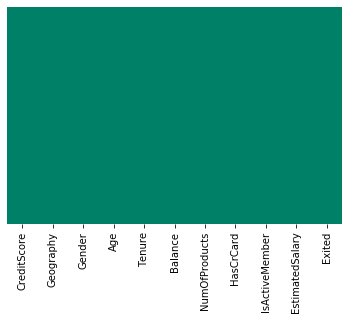

In [9]:
sb.heatmap(data.isna(),
          cbar = False,
          yticklabels = False,
          cmap = 'summer')
plt.show()

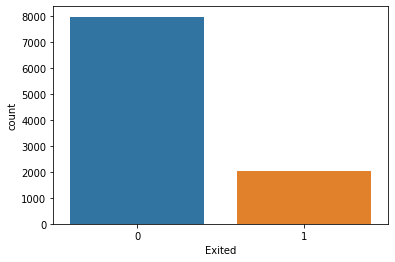

In [10]:
sb.countplot(data['Exited'])
plt.show()

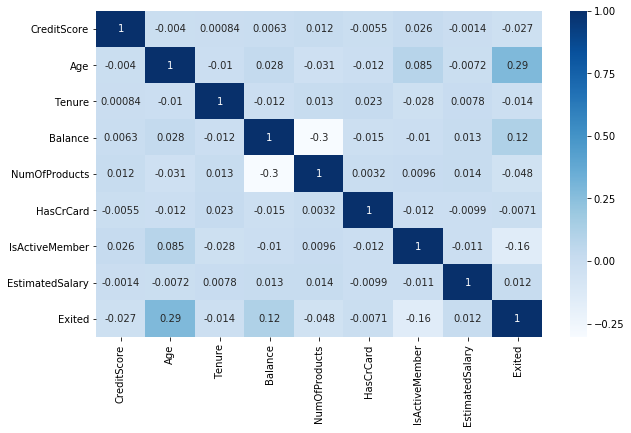

In [11]:
fig, ax = plt.subplots(figsize = (10, 6))

corr = data.corr()
ax = sb.heatmap(corr,
          annot = True,
          cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [12]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


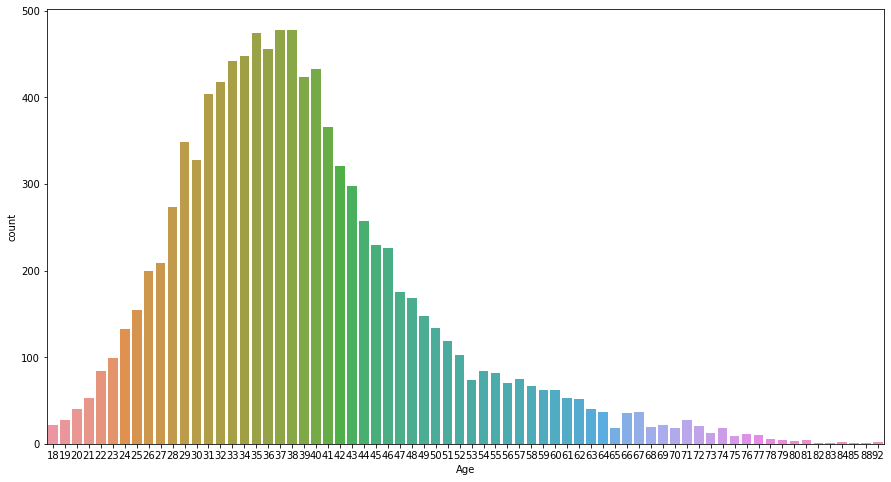

In [13]:
fig, ax = plt.subplots(figsize = (15, 8))

sb.countplot(data['Age'])
plt.show()

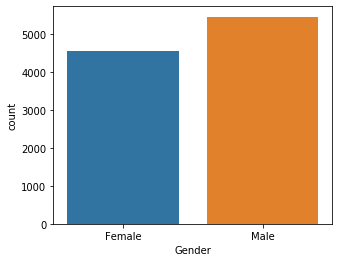

In [14]:
fig, ax = plt.subplots(figsize = (5, 4))

sb.countplot(data['Gender'])
plt.show()

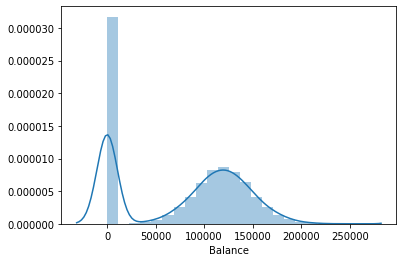

In [15]:
sb.distplot(data['Balance'])
plt.show()

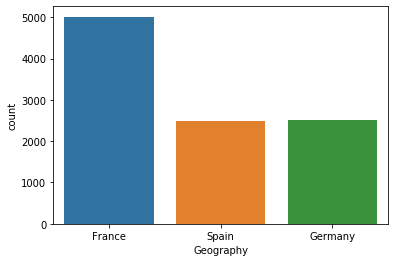

In [16]:
sb.countplot(data['Geography'])
plt.show()

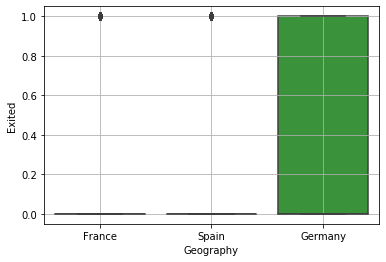

In [17]:
sb.boxplot(x = 'Geography', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

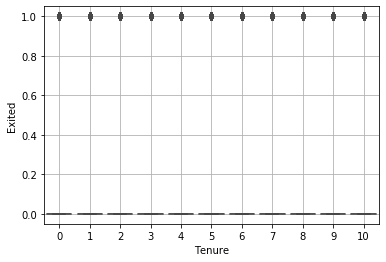

In [18]:
sb.boxplot(x = 'Tenure', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

In [19]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing

In [20]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [21]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [22]:
sc = StandardScaler()
data.iloc[:, [0,3,5,9]] = sc.fit_transform(data.iloc[:,[0,3,5,9]])

In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


In [24]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1:]

In [25]:
X.shape, Y.shape

((10000, 10), (10000, 1))

In [26]:
X[1]

array([-0.4400359548576657, 'Spain', 'Female', 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [29]:
lb_geography = LabelEncoder()
lb_gender = LabelEncoder()
X[:, 1] = lb_geography.fit_transform(X[:, 1])
X[:, 2] = lb_gender.fit_transform(X[:, 2])

In [30]:
X[1]

array([-0.4400359548576657, 2, 0, 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [31]:
ohe = OneHotEncoder(categorical_features = [1])
X = ohe.fit_transform(X).toarray()

In [32]:
X[1]

array([ 0.        ,  0.        ,  1.        , -0.44003595,  0.        ,
        0.19816383,  1.        ,  0.11735002,  1.        ,  0.        ,
        1.        ,  0.21653375])

In [33]:
X = X[:, 1:]

In [34]:
X[1]

array([ 0.        ,  1.        , -0.44003595,  0.        ,  0.19816383,
        1.        ,  0.11735002,  1.        ,  0.        ,  1.        ,
        0.21653375])

In [35]:
X.shape

(10000, 11)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [37]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 11), (8000, 1), (2000, 11), (2000, 1))

# Creating Placeholders

To create placeholders we need to disable the eager execution as place holders are not compatible with eager execution

In [38]:
tf.compat.v1.disable_eager_execution()

In [39]:
x = tf.compat.v1.placeholder(dtype = 'float32', shape = [None, 11], name = 'x')
y = tf.compat.v1.placeholder(dtype = 'float32', shape = [None, 1], name = 'y')

In [40]:
x, y

(<tf.Tensor 'x:0' shape=(None, 11) dtype=float32>,
 <tf.Tensor 'y:0' shape=(None, 1) dtype=float32>)

# Initialising weights and bias

In [41]:
sigma = 1
weight_initializer = tf.compat.v1.variance_scaling_initializer(mode = 'fan_avg', distribution = 'uniform', scale = sigma, seed = 42) 
bias_initializer = tf.zeros_initializer()

In [42]:
#Weights and Bias of 1st Layer
w1 = tf.Variable(weight_initializer([x_train.shape[1], 10]))
b1 = tf.Variable(bias_initializer([10]))

#Weights and Bias of 2nd layer
w2 = tf.Variable(weight_initializer([10, 9]))
b2 = tf.Variable(bias_initializer([9]))

#Weights and Bias of 3rd layer
# w3 = tf.Variable(weight_initializer([6, 8]))
# b3 = tf.Variable(bias_initializer([8]))


#Weights and Bias of output layer
wo = tf.Variable(weight_initializer([9, 1]))
bo = tf.Variable(bias_initializer([1]))

init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [43]:
w1, b1

(<tf.Variable 'Variable:0' shape=(11, 10) dtype=float32>,
 <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32>)

In [44]:
w2, b2

(<tf.Variable 'Variable_2:0' shape=(10, 9) dtype=float32>,
 <tf.Variable 'Variable_3:0' shape=(9,) dtype=float32>)

In [45]:
# w3, b3

In [46]:
wo, bo

(<tf.Variable 'Variable_4:0' shape=(9, 1) dtype=float32>,
 <tf.Variable 'Variable_5:0' shape=(1,) dtype=float32>)

# Forward Propagation

In [47]:
#Layer1 with relu activation function
hidden1 = tf.add(tf.matmul(x, w1), b1)
hidden1 = tf.nn.relu(hidden1)

#layer2 with relu activation function
hidden2 = tf.add(tf.matmul(hidden1, w2), b2)
hidden2 = tf.nn.relu(hidden2)

#layer3
# hidden3 = tf.add(tf.matmul(hidden2, w3), b3)
# hidden3 = tf.nn.relu(hidden3)

#output layer 
out = tf.add(tf.matmul(hidden2, wo), bo, name = 'output')

In [48]:
hidden1, hidden2, out

(<tf.Tensor 'Relu:0' shape=(None, 10) dtype=float32>,
 <tf.Tensor 'Relu_1:0' shape=(None, 9) dtype=float32>,
 <tf.Tensor 'output:0' shape=(None, 1) dtype=float32>)

# Cost Function

cross Entropy:

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

In [49]:
cost_function = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = out, labels = y))

### tf.nn.sigmoid_cross_entropy_with_logits computes the cost for a sigmoid layer.

In [50]:
cost_function

<tf.Tensor 'Mean:0' shape=() dtype=float32>


# Optimizer

In [51]:
learning_rate = 0.0001
opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

# launching the graph in Session

In [52]:
sess = tf.compat.v1.Session()
sess.run(init)

In [53]:
sess

# Back Propagation

In [54]:
Training_loss = [ ]
Test_loss = [ ]
pred = [ ]
epochs = 3000
for epoch in range (epochs):
    sess.run(opt, feed_dict = {x: x_train, y: y_train})
    Training_loss.append(sess.run(cost_function, feed_dict = {x: x_train, y: y_train}))
    Test_loss.append(sess.run(cost_function, feed_dict = {x: x_test, y: y_test}))
    
    
    print('Epoch:', epoch, 'Training Cost:', Training_loss[epoch], 'Test Cost:', Test_loss[epoch])

Epoch: 0 Training Cost: 1.6541809 Test Cost: 1.6878098
Epoch: 1 Training Cost: 1.6519028 Test Cost: 1.6854726
Epoch: 2 Training Cost: 1.6496304 Test Cost: 1.6831402
Epoch: 3 Training Cost: 1.6473645 Test Cost: 1.6808128
Epoch: 4 Training Cost: 1.6451048 Test Cost: 1.678492
Epoch: 5 Training Cost: 1.6428506 Test Cost: 1.6761774
Epoch: 6 Training Cost: 1.6406019 Test Cost: 1.6738685
Epoch: 7 Training Cost: 1.6383575 Test Cost: 1.6715652
Epoch: 8 Training Cost: 1.6361184 Test Cost: 1.669266
Epoch: 9 Training Cost: 1.6338842 Test Cost: 1.6669732
Epoch: 10 Training Cost: 1.6316555 Test Cost: 1.664685
Epoch: 11 Training Cost: 1.6294332 Test Cost: 1.6624023
Epoch: 12 Training Cost: 1.6272159 Test Cost: 1.6601243
Epoch: 13 Training Cost: 1.625007 Test Cost: 1.6578525
Epoch: 14 Training Cost: 1.6228042 Test Cost: 1.6555886
Epoch: 15 Training Cost: 1.620606 Test Cost: 1.6533283
Epoch: 16 Training Cost: 1.6184136 Test Cost: 1.6510736
Epoch: 17 Training Cost: 1.6162283 Test Cost: 1.6488278
Epoch: 

Epoch: 156 Training Cost: 1.3715317 Test Cost: 1.3962065
Epoch: 157 Training Cost: 1.3701564 Test Cost: 1.3947812
Epoch: 158 Training Cost: 1.3687868 Test Cost: 1.3933626
Epoch: 159 Training Cost: 1.3674219 Test Cost: 1.3919473
Epoch: 160 Training Cost: 1.3660605 Test Cost: 1.3905369
Epoch: 161 Training Cost: 1.3647034 Test Cost: 1.3891327
Epoch: 162 Training Cost: 1.3633513 Test Cost: 1.3877319
Epoch: 163 Training Cost: 1.3620043 Test Cost: 1.3863362
Epoch: 164 Training Cost: 1.3606619 Test Cost: 1.3849465
Epoch: 165 Training Cost: 1.359324 Test Cost: 1.3835624
Epoch: 166 Training Cost: 1.3579898 Test Cost: 1.3821826
Epoch: 167 Training Cost: 1.3566604 Test Cost: 1.3808079
Epoch: 168 Training Cost: 1.355336 Test Cost: 1.3794372
Epoch: 169 Training Cost: 1.3540155 Test Cost: 1.3780714
Epoch: 170 Training Cost: 1.352701 Test Cost: 1.3767112
Epoch: 171 Training Cost: 1.3513892 Test Cost: 1.3753548
Epoch: 172 Training Cost: 1.3500818 Test Cost: 1.374002
Epoch: 173 Training Cost: 1.34878 T

Epoch: 319 Training Cost: 1.1938543 Test Cost: 1.2132717
Epoch: 320 Training Cost: 1.192981 Test Cost: 1.2123713
Epoch: 321 Training Cost: 1.1921101 Test Cost: 1.2114724
Epoch: 322 Training Cost: 1.1912413 Test Cost: 1.2105756
Epoch: 323 Training Cost: 1.1903734 Test Cost: 1.2096803
Epoch: 324 Training Cost: 1.1895081 Test Cost: 1.2087866
Epoch: 325 Training Cost: 1.1886443 Test Cost: 1.207896
Epoch: 326 Training Cost: 1.1877828 Test Cost: 1.207007
Epoch: 327 Training Cost: 1.1869234 Test Cost: 1.2061206
Epoch: 328 Training Cost: 1.1860659 Test Cost: 1.2052358
Epoch: 329 Training Cost: 1.1852102 Test Cost: 1.2043536
Epoch: 330 Training Cost: 1.184357 Test Cost: 1.2034738
Epoch: 331 Training Cost: 1.183505 Test Cost: 1.2025955
Epoch: 332 Training Cost: 1.1826547 Test Cost: 1.2017188
Epoch: 333 Training Cost: 1.1818074 Test Cost: 1.2008442
Epoch: 334 Training Cost: 1.1809604 Test Cost: 1.1999711
Epoch: 335 Training Cost: 1.1801157 Test Cost: 1.1991001
Epoch: 336 Training Cost: 1.1792727 

Epoch: 480 Training Cost: 1.0739583 Test Cost: 1.0898938
Epoch: 481 Training Cost: 1.0733232 Test Cost: 1.0892397
Epoch: 482 Training Cost: 1.0726888 Test Cost: 1.0885867
Epoch: 483 Training Cost: 1.0720556 Test Cost: 1.0879351
Epoch: 484 Training Cost: 1.0714238 Test Cost: 1.0872836
Epoch: 485 Training Cost: 1.0707928 Test Cost: 1.0866344
Epoch: 486 Training Cost: 1.0701629 Test Cost: 1.085986
Epoch: 487 Training Cost: 1.069534 Test Cost: 1.0853386
Epoch: 488 Training Cost: 1.0689057 Test Cost: 1.0846924
Epoch: 489 Training Cost: 1.0682793 Test Cost: 1.0840478
Epoch: 490 Training Cost: 1.0676535 Test Cost: 1.0834043
Epoch: 491 Training Cost: 1.0670288 Test Cost: 1.0827619
Epoch: 492 Training Cost: 1.066406 Test Cost: 1.0821205
Epoch: 493 Training Cost: 1.065784 Test Cost: 1.081481
Epoch: 494 Training Cost: 1.0651629 Test Cost: 1.080842
Epoch: 495 Training Cost: 1.0645428 Test Cost: 1.0802039
Epoch: 496 Training Cost: 1.0639235 Test Cost: 1.0795664
Epoch: 497 Training Cost: 1.0633047 T

Epoch: 635 Training Cost: 0.987304 Test Cost: 1.0008425
Epoch: 636 Training Cost: 0.98681486 Test Cost: 1.0003409
Epoch: 637 Training Cost: 0.98632663 Test Cost: 0.99983984
Epoch: 638 Training Cost: 0.98583925 Test Cost: 0.99933946
Epoch: 639 Training Cost: 0.9853526 Test Cost: 0.9988403
Epoch: 640 Training Cost: 0.98486644 Test Cost: 0.9983413
Epoch: 641 Training Cost: 0.98438156 Test Cost: 0.99784327
Epoch: 642 Training Cost: 0.98389745 Test Cost: 0.99734634
Epoch: 643 Training Cost: 0.98341346 Test Cost: 0.99685013
Epoch: 644 Training Cost: 0.9829305 Test Cost: 0.99635464
Epoch: 645 Training Cost: 0.9824481 Test Cost: 0.9958595
Epoch: 646 Training Cost: 0.9819668 Test Cost: 0.9953654
Epoch: 647 Training Cost: 0.9814862 Test Cost: 0.9948719
Epoch: 648 Training Cost: 0.98100644 Test Cost: 0.9943792
Epoch: 649 Training Cost: 0.98052734 Test Cost: 0.9938874
Epoch: 650 Training Cost: 0.9800494 Test Cost: 0.99339706
Epoch: 651 Training Cost: 0.9795724 Test Cost: 0.99290687
Epoch: 652 Trai

Epoch: 794 Training Cost: 0.918676 Test Cost: 0.93042713
Epoch: 795 Training Cost: 0.91829705 Test Cost: 0.93003947
Epoch: 796 Training Cost: 0.91791904 Test Cost: 0.92965263
Epoch: 797 Training Cost: 0.9175416 Test Cost: 0.929266
Epoch: 798 Training Cost: 0.9171647 Test Cost: 0.92888063
Epoch: 799 Training Cost: 0.91678846 Test Cost: 0.9284955
Epoch: 800 Training Cost: 0.9164127 Test Cost: 0.92811126
Epoch: 801 Training Cost: 0.91603786 Test Cost: 0.92772764
Epoch: 802 Training Cost: 0.91566336 Test Cost: 0.9273441
Epoch: 803 Training Cost: 0.91528946 Test Cost: 0.92696154
Epoch: 804 Training Cost: 0.9149163 Test Cost: 0.92657924
Epoch: 805 Training Cost: 0.91454315 Test Cost: 0.92619777
Epoch: 806 Training Cost: 0.9141708 Test Cost: 0.925817
Epoch: 807 Training Cost: 0.913799 Test Cost: 0.9254368
Epoch: 808 Training Cost: 0.91342825 Test Cost: 0.9250566
Epoch: 809 Training Cost: 0.9130575 Test Cost: 0.92467713
Epoch: 810 Training Cost: 0.9126871 Test Cost: 0.92429906
Epoch: 811 Train

Epoch: 945 Training Cost: 0.8675496 Test Cost: 0.8780013
Epoch: 946 Training Cost: 0.8672474 Test Cost: 0.87769204
Epoch: 947 Training Cost: 0.86694574 Test Cost: 0.8773828
Epoch: 948 Training Cost: 0.8666445 Test Cost: 0.8770744
Epoch: 949 Training Cost: 0.86634374 Test Cost: 0.8767665
Epoch: 950 Training Cost: 0.8660433 Test Cost: 0.87645906
Epoch: 951 Training Cost: 0.86574316 Test Cost: 0.8761521
Epoch: 952 Training Cost: 0.86544394 Test Cost: 0.87584555
Epoch: 953 Training Cost: 0.865145 Test Cost: 0.8755396
Epoch: 954 Training Cost: 0.86484647 Test Cost: 0.8752345
Epoch: 955 Training Cost: 0.86454827 Test Cost: 0.8749291
Epoch: 956 Training Cost: 0.8642508 Test Cost: 0.87462443
Epoch: 957 Training Cost: 0.86395377 Test Cost: 0.8743207
Epoch: 958 Training Cost: 0.86365724 Test Cost: 0.8740172
Epoch: 959 Training Cost: 0.8633609 Test Cost: 0.8737141
Epoch: 960 Training Cost: 0.8630652 Test Cost: 0.8734116
Epoch: 961 Training Cost: 0.86277014 Test Cost: 0.8731101
Epoch: 962 Training

Epoch: 1114 Training Cost: 0.82216454 Test Cost: 0.83175737
Epoch: 1115 Training Cost: 0.8219276 Test Cost: 0.831517
Epoch: 1116 Training Cost: 0.8216906 Test Cost: 0.83127695
Epoch: 1117 Training Cost: 0.8214541 Test Cost: 0.8310371
Epoch: 1118 Training Cost: 0.8212178 Test Cost: 0.830798
Epoch: 1119 Training Cost: 0.8209817 Test Cost: 0.8305589
Epoch: 1120 Training Cost: 0.8207463 Test Cost: 0.83031976
Epoch: 1121 Training Cost: 0.820511 Test Cost: 0.8300813
Epoch: 1122 Training Cost: 0.82027626 Test Cost: 0.829843
Epoch: 1123 Training Cost: 0.82004124 Test Cost: 0.8296046
Epoch: 1124 Training Cost: 0.8198071 Test Cost: 0.8293669
Epoch: 1125 Training Cost: 0.81957287 Test Cost: 0.8291296
Epoch: 1126 Training Cost: 0.81933886 Test Cost: 0.82889235
Epoch: 1127 Training Cost: 0.81910545 Test Cost: 0.8286551
Epoch: 1128 Training Cost: 0.8188726 Test Cost: 0.8284188
Epoch: 1129 Training Cost: 0.81863976 Test Cost: 0.82818246
Epoch: 1130 Training Cost: 0.8184074 Test Cost: 0.82794666
Epoch

Epoch: 1259 Training Cost: 0.7909696 Test Cost: 0.7999646
Epoch: 1260 Training Cost: 0.79077446 Test Cost: 0.79976547
Epoch: 1261 Training Cost: 0.7905801 Test Cost: 0.7995666
Epoch: 1262 Training Cost: 0.79038584 Test Cost: 0.79936755
Epoch: 1263 Training Cost: 0.79019177 Test Cost: 0.7991689
Epoch: 1264 Training Cost: 0.78999805 Test Cost: 0.7989702
Epoch: 1265 Training Cost: 0.7898045 Test Cost: 0.798772
Epoch: 1266 Training Cost: 0.78961134 Test Cost: 0.798574
Epoch: 1267 Training Cost: 0.7894181 Test Cost: 0.7983762
Epoch: 1268 Training Cost: 0.7892256 Test Cost: 0.798179
Epoch: 1269 Training Cost: 0.78903294 Test Cost: 0.79798156
Epoch: 1270 Training Cost: 0.7888411 Test Cost: 0.7977848
Epoch: 1271 Training Cost: 0.78864944 Test Cost: 0.7975882
Epoch: 1272 Training Cost: 0.788458 Test Cost: 0.7973917
Epoch: 1273 Training Cost: 0.7882667 Test Cost: 0.79719603
Epoch: 1274 Training Cost: 0.7880757 Test Cost: 0.7970001
Epoch: 1275 Training Cost: 0.7878849 Test Cost: 0.7968047
Epoch: 

Epoch: 1426 Training Cost: 0.7615613 Test Cost: 0.7698081
Epoch: 1427 Training Cost: 0.76140225 Test Cost: 0.76964474
Epoch: 1428 Training Cost: 0.7612434 Test Cost: 0.7694815
Epoch: 1429 Training Cost: 0.7610849 Test Cost: 0.7693187
Epoch: 1430 Training Cost: 0.7609265 Test Cost: 0.7691556
Epoch: 1431 Training Cost: 0.7607684 Test Cost: 0.76899326
Epoch: 1432 Training Cost: 0.76061046 Test Cost: 0.76883096
Epoch: 1433 Training Cost: 0.760453 Test Cost: 0.76866883
Epoch: 1434 Training Cost: 0.7602954 Test Cost: 0.76850677
Epoch: 1435 Training Cost: 0.76013774 Test Cost: 0.7683451
Epoch: 1436 Training Cost: 0.75998086 Test Cost: 0.76818323
Epoch: 1437 Training Cost: 0.7598235 Test Cost: 0.7680217
Epoch: 1438 Training Cost: 0.7596669 Test Cost: 0.76786023
Epoch: 1439 Training Cost: 0.75951046 Test Cost: 0.767699
Epoch: 1440 Training Cost: 0.75935394 Test Cost: 0.7675381
Epoch: 1441 Training Cost: 0.75919795 Test Cost: 0.76737744
Epoch: 1442 Training Cost: 0.75904197 Test Cost: 0.7672169


Epoch: 1599 Training Cost: 0.7364783 Test Cost: 0.74402267
Epoch: 1600 Training Cost: 0.7363463 Test Cost: 0.7438869
Epoch: 1601 Training Cost: 0.73621476 Test Cost: 0.74375135
Epoch: 1602 Training Cost: 0.7360834 Test Cost: 0.7436159
Epoch: 1603 Training Cost: 0.735952 Test Cost: 0.7434804
Epoch: 1604 Training Cost: 0.73582065 Test Cost: 0.74334526
Epoch: 1605 Training Cost: 0.7356894 Test Cost: 0.74321
Epoch: 1606 Training Cost: 0.7355583 Test Cost: 0.743075
Epoch: 1607 Training Cost: 0.73542726 Test Cost: 0.74294007
Epoch: 1608 Training Cost: 0.73529625 Test Cost: 0.7428052
Epoch: 1609 Training Cost: 0.7351654 Test Cost: 0.74267054
Epoch: 1610 Training Cost: 0.7350348 Test Cost: 0.7425361
Epoch: 1611 Training Cost: 0.73490417 Test Cost: 0.7424016
Epoch: 1612 Training Cost: 0.73477393 Test Cost: 0.74226755
Epoch: 1613 Training Cost: 0.73464364 Test Cost: 0.74213344
Epoch: 1614 Training Cost: 0.7345134 Test Cost: 0.7419994
Epoch: 1615 Training Cost: 0.73438305 Test Cost: 0.74186546
Ep

Epoch: 1755 Training Cost: 0.7172933 Test Cost: 0.7243043
Epoch: 1756 Training Cost: 0.7171786 Test Cost: 0.7241872
Epoch: 1757 Training Cost: 0.7170641 Test Cost: 0.7240701
Epoch: 1758 Training Cost: 0.7169497 Test Cost: 0.7239531
Epoch: 1759 Training Cost: 0.7168351 Test Cost: 0.72383624
Epoch: 1760 Training Cost: 0.71672136 Test Cost: 0.72371936
Epoch: 1761 Training Cost: 0.7166072 Test Cost: 0.7236029
Epoch: 1762 Training Cost: 0.71649325 Test Cost: 0.72348636
Epoch: 1763 Training Cost: 0.71637934 Test Cost: 0.72337
Epoch: 1764 Training Cost: 0.7162656 Test Cost: 0.7232536
Epoch: 1765 Training Cost: 0.71615195 Test Cost: 0.7231373
Epoch: 1766 Training Cost: 0.71603835 Test Cost: 0.7230215
Epoch: 1767 Training Cost: 0.7159246 Test Cost: 0.7229054
Epoch: 1768 Training Cost: 0.7158115 Test Cost: 0.72278965
Epoch: 1769 Training Cost: 0.71569836 Test Cost: 0.72267383
Epoch: 1770 Training Cost: 0.71558493 Test Cost: 0.7225584
Epoch: 1771 Training Cost: 0.7154719 Test Cost: 0.72244257
Epo

Epoch: 1906 Training Cost: 0.7010948 Test Cost: 0.7077632
Epoch: 1907 Training Cost: 0.70099413 Test Cost: 0.7076609
Epoch: 1908 Training Cost: 0.7008936 Test Cost: 0.7075584
Epoch: 1909 Training Cost: 0.7007935 Test Cost: 0.70745605
Epoch: 1910 Training Cost: 0.7006928 Test Cost: 0.70735353
Epoch: 1911 Training Cost: 0.7005926 Test Cost: 0.7072514
Epoch: 1912 Training Cost: 0.7004923 Test Cost: 0.707149
Epoch: 1913 Training Cost: 0.7003923 Test Cost: 0.707047
Epoch: 1914 Training Cost: 0.7002922 Test Cost: 0.7069451
Epoch: 1915 Training Cost: 0.70019215 Test Cost: 0.70684326
Epoch: 1916 Training Cost: 0.70009226 Test Cost: 0.70674115
Epoch: 1917 Training Cost: 0.69999266 Test Cost: 0.7066394
Epoch: 1918 Training Cost: 0.6998928 Test Cost: 0.7065377
Epoch: 1919 Training Cost: 0.69979286 Test Cost: 0.7064359
Epoch: 1920 Training Cost: 0.69969326 Test Cost: 0.7063339
Epoch: 1921 Training Cost: 0.6995939 Test Cost: 0.70623267
Epoch: 1922 Training Cost: 0.6994941 Test Cost: 0.7061312
Epoch

Epoch: 2053 Training Cost: 0.68707895 Test Cost: 0.6934893
Epoch: 2054 Training Cost: 0.68698865 Test Cost: 0.6933977
Epoch: 2055 Training Cost: 0.68689847 Test Cost: 0.6933056
Epoch: 2056 Training Cost: 0.6868079 Test Cost: 0.69321364
Epoch: 2057 Training Cost: 0.68671805 Test Cost: 0.6931221
Epoch: 2058 Training Cost: 0.6866279 Test Cost: 0.69303036
Epoch: 2059 Training Cost: 0.6865376 Test Cost: 0.6929387
Epoch: 2060 Training Cost: 0.6864475 Test Cost: 0.6928471
Epoch: 2061 Training Cost: 0.68635744 Test Cost: 0.69275546
Epoch: 2062 Training Cost: 0.6862677 Test Cost: 0.69266397
Epoch: 2063 Training Cost: 0.6861776 Test Cost: 0.6925726
Epoch: 2064 Training Cost: 0.6860879 Test Cost: 0.6924811
Epoch: 2065 Training Cost: 0.6859979 Test Cost: 0.6923895
Epoch: 2066 Training Cost: 0.68590844 Test Cost: 0.6922985
Epoch: 2067 Training Cost: 0.68581855 Test Cost: 0.69220716
Epoch: 2068 Training Cost: 0.6857291 Test Cost: 0.692116
Epoch: 2069 Training Cost: 0.6856392 Test Cost: 0.6920251
Epo

Epoch: 2206 Training Cost: 0.6739323 Test Cost: 0.6801154
Epoch: 2207 Training Cost: 0.67385066 Test Cost: 0.6800324
Epoch: 2208 Training Cost: 0.6737692 Test Cost: 0.6799496
Epoch: 2209 Training Cost: 0.67368764 Test Cost: 0.67986697
Epoch: 2210 Training Cost: 0.6736061 Test Cost: 0.67978394
Epoch: 2211 Training Cost: 0.67352504 Test Cost: 0.67970115
Epoch: 2212 Training Cost: 0.6734436 Test Cost: 0.6796186
Epoch: 2213 Training Cost: 0.6733626 Test Cost: 0.6795361
Epoch: 2214 Training Cost: 0.67328125 Test Cost: 0.67945373
Epoch: 2215 Training Cost: 0.6732002 Test Cost: 0.67937136
Epoch: 2216 Training Cost: 0.6731191 Test Cost: 0.679289
Epoch: 2217 Training Cost: 0.6730382 Test Cost: 0.67920697
Epoch: 2218 Training Cost: 0.6729573 Test Cost: 0.67912465
Epoch: 2219 Training Cost: 0.6728765 Test Cost: 0.6790426
Epoch: 2220 Training Cost: 0.6727956 Test Cost: 0.6789604
Epoch: 2221 Training Cost: 0.67271465 Test Cost: 0.6788783
Epoch: 2222 Training Cost: 0.67263377 Test Cost: 0.6787964
Ep

Epoch: 2358 Training Cost: 0.66214484 Test Cost: 0.6681161
Epoch: 2359 Training Cost: 0.66207093 Test Cost: 0.6680405
Epoch: 2360 Training Cost: 0.66199744 Test Cost: 0.6679654
Epoch: 2361 Training Cost: 0.6619236 Test Cost: 0.66788995
Epoch: 2362 Training Cost: 0.66184986 Test Cost: 0.6678147
Epoch: 2363 Training Cost: 0.6617761 Test Cost: 0.6677392
Epoch: 2364 Training Cost: 0.66170263 Test Cost: 0.66766435
Epoch: 2365 Training Cost: 0.6616288 Test Cost: 0.667589
Epoch: 2366 Training Cost: 0.66155523 Test Cost: 0.6675138
Epoch: 2367 Training Cost: 0.6614819 Test Cost: 0.66743904
Epoch: 2368 Training Cost: 0.66140836 Test Cost: 0.6673641
Epoch: 2369 Training Cost: 0.66133493 Test Cost: 0.6672891
Epoch: 2370 Training Cost: 0.66126186 Test Cost: 0.66721433
Epoch: 2371 Training Cost: 0.6611883 Test Cost: 0.6671394
Epoch: 2372 Training Cost: 0.6611152 Test Cost: 0.66706455
Epoch: 2373 Training Cost: 0.6610418 Test Cost: 0.6669897
Epoch: 2374 Training Cost: 0.6609685 Test Cost: 0.66691506


Epoch: 2502 Training Cost: 0.6519494 Test Cost: 0.657709
Epoch: 2503 Training Cost: 0.6518812 Test Cost: 0.65763974
Epoch: 2504 Training Cost: 0.65181345 Test Cost: 0.6575705
Epoch: 2505 Training Cost: 0.6517456 Test Cost: 0.6575011
Epoch: 2506 Training Cost: 0.65167785 Test Cost: 0.65743214
Epoch: 2507 Training Cost: 0.65161014 Test Cost: 0.6573628
Epoch: 2508 Training Cost: 0.65154237 Test Cost: 0.6572937
Epoch: 2509 Training Cost: 0.65147483 Test Cost: 0.6572244
Epoch: 2510 Training Cost: 0.6514072 Test Cost: 0.6571554
Epoch: 2511 Training Cost: 0.65133953 Test Cost: 0.6570867
Epoch: 2512 Training Cost: 0.651272 Test Cost: 0.65701747
Epoch: 2513 Training Cost: 0.65120435 Test Cost: 0.6569486
Epoch: 2514 Training Cost: 0.6511371 Test Cost: 0.6568799
Epoch: 2515 Training Cost: 0.65106946 Test Cost: 0.6568115
Epoch: 2516 Training Cost: 0.65100205 Test Cost: 0.6567426
Epoch: 2517 Training Cost: 0.6509348 Test Cost: 0.6566737
Epoch: 2518 Training Cost: 0.6508674 Test Cost: 0.6566054
Epoc

Epoch: 2654 Training Cost: 0.64203733 Test Cost: 0.647616
Epoch: 2655 Training Cost: 0.6419745 Test Cost: 0.6475525
Epoch: 2656 Training Cost: 0.64191186 Test Cost: 0.64748865
Epoch: 2657 Training Cost: 0.64184964 Test Cost: 0.6474256
Epoch: 2658 Training Cost: 0.64178723 Test Cost: 0.64736193
Epoch: 2659 Training Cost: 0.6417248 Test Cost: 0.6472982
Epoch: 2660 Training Cost: 0.6416625 Test Cost: 0.64723504
Epoch: 2661 Training Cost: 0.6416002 Test Cost: 0.6471715
Epoch: 2662 Training Cost: 0.6415381 Test Cost: 0.6471082
Epoch: 2663 Training Cost: 0.64147574 Test Cost: 0.64704466
Epoch: 2664 Training Cost: 0.64141345 Test Cost: 0.6469816
Epoch: 2665 Training Cost: 0.6413511 Test Cost: 0.64691824
Epoch: 2666 Training Cost: 0.64128906 Test Cost: 0.646855
Epoch: 2667 Training Cost: 0.6412269 Test Cost: 0.6467918
Epoch: 2668 Training Cost: 0.6411648 Test Cost: 0.6467285
Epoch: 2669 Training Cost: 0.64110297 Test Cost: 0.6466655
Epoch: 2670 Training Cost: 0.6410405 Test Cost: 0.6466025
Epo

Epoch: 2809 Training Cost: 0.63271946 Test Cost: 0.6381399
Epoch: 2810 Training Cost: 0.63266164 Test Cost: 0.63808125
Epoch: 2811 Training Cost: 0.6326038 Test Cost: 0.63802254
Epoch: 2812 Training Cost: 0.632546 Test Cost: 0.6379639
Epoch: 2813 Training Cost: 0.63248813 Test Cost: 0.63790524
Epoch: 2814 Training Cost: 0.6324305 Test Cost: 0.6378467
Epoch: 2815 Training Cost: 0.63237274 Test Cost: 0.63778794
Epoch: 2816 Training Cost: 0.63231486 Test Cost: 0.6377294
Epoch: 2817 Training Cost: 0.6322575 Test Cost: 0.63767093
Epoch: 2818 Training Cost: 0.6321996 Test Cost: 0.6376124
Epoch: 2819 Training Cost: 0.63214195 Test Cost: 0.6375542
Epoch: 2820 Training Cost: 0.6320842 Test Cost: 0.6374956
Epoch: 2821 Training Cost: 0.63202685 Test Cost: 0.637437
Epoch: 2822 Training Cost: 0.6319694 Test Cost: 0.63737875
Epoch: 2823 Training Cost: 0.6319116 Test Cost: 0.63732046
Epoch: 2824 Training Cost: 0.6318542 Test Cost: 0.637262
Epoch: 2825 Training Cost: 0.6317965 Test Cost: 0.6372037
Epo

Epoch: 2969 Training Cost: 0.6238142 Test Cost: 0.62911475
Epoch: 2970 Training Cost: 0.62376064 Test Cost: 0.62906045
Epoch: 2971 Training Cost: 0.6237071 Test Cost: 0.6290062
Epoch: 2972 Training Cost: 0.6236537 Test Cost: 0.6289518
Epoch: 2973 Training Cost: 0.62360036 Test Cost: 0.62889796
Epoch: 2974 Training Cost: 0.623547 Test Cost: 0.6288437
Epoch: 2975 Training Cost: 0.6234936 Test Cost: 0.62878966
Epoch: 2976 Training Cost: 0.62344044 Test Cost: 0.62873566
Epoch: 2977 Training Cost: 0.6233871 Test Cost: 0.6286814
Epoch: 2978 Training Cost: 0.6233339 Test Cost: 0.62862724
Epoch: 2979 Training Cost: 0.62328047 Test Cost: 0.62857354
Epoch: 2980 Training Cost: 0.6232272 Test Cost: 0.6285193
Epoch: 2981 Training Cost: 0.6231744 Test Cost: 0.62846565
Epoch: 2982 Training Cost: 0.6231208 Test Cost: 0.6284115
Epoch: 2983 Training Cost: 0.6230676 Test Cost: 0.6283576
Epoch: 2984 Training Cost: 0.62301475 Test Cost: 0.6283037
Epoch: 2985 Training Cost: 0.62296164 Test Cost: 0.6282501
E

## Using the Sigmoid Activation Function to get the probabilities 

In [55]:
output = tf.nn.sigmoid(out)

In [56]:
y_pred = sess.run(output, feed_dict = {x: x_test})

In [57]:
y_pred

array([[0.4151421 ],
       [0.37561768],
       [0.49090886],
       ...,
       [0.40183756],
       [0.52160245],
       [0.4070456 ]], dtype=float32)

In [58]:
y_pred = (y_pred > 0.5)

In [59]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1359,  236],
       [ 271,  134]])

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1595
           1       0.36      0.33      0.35       405

    accuracy                           0.75      2000
   macro avg       0.60      0.59      0.59      2000
weighted avg       0.74      0.75      0.74      2000



In [62]:
print(accuracy_score(y_test, y_pred))

0.7465


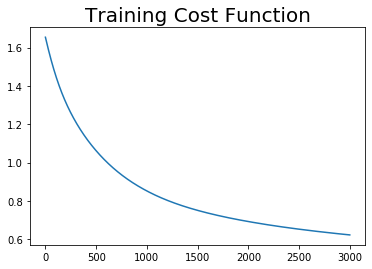

In [63]:
plt.plot(Training_loss)
plt.title('Training Cost Function', fontsize = 20)
plt.show()

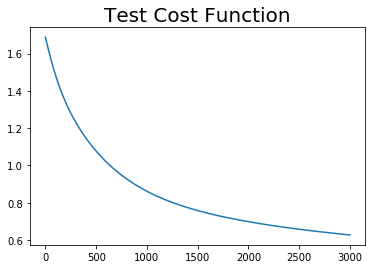

In [64]:
plt.plot(Test_loss)
plt.title('Test Cost Function', fontsize = 20)
plt.show()

# Saving the Model

In [65]:
saver = tf.compat.v1.train.Saver()
saver.save(sess,'classification_models/Bank.ckpt')

'classification_models/Bank.ckpt'

# Loading the model

In [66]:
with tf.compat.v1.Session() as ses:
    saver = tf.compat.v1.train.import_meta_graph('/home/admin1/Tensorflow/classification_models/Bank.ckpt.meta')
    model = saver.restore(ses, tf.train.latest_checkpoint('/home/admin1/Tensorflow/classification_models/'))
    
    graph = tf.compat.v1.get_default_graph()
    input_x = graph.get_tensor_by_name("x:0")
    input_y = graph.get_tensor_by_name("y:0")
    
    output = graph.get_tensor_by_name("output:0")
    
    
    feed_dict = {input_x: x_test}
    predictions = output.eval(feed_dict = feed_dict)
    result = tf.nn.sigmoid(predictions)
    y_pred = ses.run(result, feed_dict = {x: x_test})

INFO:tensorflow:Restoring parameters from /home/admin1/Tensorflow/classification_models/Bank.ckpt


In [67]:
y_pred

array([[0.4151421 ],
       [0.37561768],
       [0.49090886],
       ...,
       [0.40183756],
       [0.52160245],
       [0.4070456 ]], dtype=float32)

# Predicting for one input value

In [68]:
a = X[500]

In [69]:
a

array([ 0.        ,  1.        , -0.98841507,  1.        , -0.66001848,
        4.        , -1.22584767,  2.        ,  1.        ,  1.        ,
       -0.79440693])

In [70]:
a.shape

(11,)

In [71]:
a = np.reshape(a, (1, 11))

In [72]:
a.shape

(1, 11)

In [80]:
with tf.compat.v1.Session() as ses:
    saver = tf.compat.v1.train.import_meta_graph('/home/admin1/Tensorflow/classification_models/Bank.ckpt.meta')
    model = saver.restore(ses, tf.train.latest_checkpoint('/home/admin1/Tensorflow/classification_models/'))
    
    graph = tf.compat.v1.get_default_graph()
    input_x = graph.get_tensor_by_name("x:0")
    input_y = graph.get_tensor_by_name("y:0")
    
    output = graph.get_tensor_by_name("output:0")
    
    
    feed_dict = {input_x: a}
    prediction = output.eval(feed_dict = feed_dict)
    result = tf.nn.sigmoid(prediction)
    pred = ses.run(result, feed_dict = {x: a})

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
INFO:tensorflow:Restoring parameters from /home/admin1/Tensorflow/classification_models/Bank.ckpt


In [81]:
pred

array([[0.40674144]], dtype=float32)

In [75]:
if pred > 0.5:
    print('Exited')
else:
    print('Not Exited')

Not Exited


In [76]:
import pickle

In [77]:
model = {'LBGeography': lb_geography, 'LBGender':lb_gender, 'OHE': ohe, 'SC': sc}

In [78]:
model

{'LBGeography': LabelEncoder(),
 'LBGender': LabelEncoder(),
 'OHE': OneHotEncoder(categorical_features=[1], categories=None, drop=None,
               dtype=<class 'numpy.float64'>, handle_unknown='error',
               n_values=None, sparse=True),
 'SC': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [79]:
pickle.dump(model, open('model.pkl','wb'))